In [1]:
# import dependencies and global settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

In [2]:
# load features and target dataframe
df = pd.read_csv('./data_frames/housing_df.csv', index_col=0)
X = pd.read_csv('./data_frames/housing_X_features.csv', index_col=0)
y = pd.read_csv('./data_frames/housing_y_target.csv', index_col=0)
X

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,856,30,RL,68.516053,7890,Pave,N_A,Reg,Lvl,AllPub,...,166,0,0,0,N_A,0,3,2010,WD,Normal
2,1049,120,RL,42.000000,4235,Pave,N_A,Reg,Lvl,AllPub,...,0,0,0,0,N_A,0,2,2009,WD,Normal
3,1001,30,C (all),60.000000,6060,Pave,N_A,Reg,Lvl,AllPub,...,0,0,0,0,N_A,0,11,2007,WD,Normal
4,1039,70,RL,80.000000,8146,Pave,N_A,Reg,Lvl,AllPub,...,111,0,0,0,N_A,0,5,2009,WD,Normal
5,1665,60,RL,70.000000,8400,Pave,N_A,Reg,Lvl,AllPub,...,0,0,0,0,N_A,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,30,RL,68.516053,8854,Pave,N_A,Reg,Lvl,AllPub,...,40,0,0,0,N_A,0,5,2009,WD,Normal
760,1733,20,RL,68.516053,13680,Pave,N_A,IR1,Lvl,AllPub,...,0,0,0,0,N_A,0,6,2009,WD,Normal
761,2002,90,RH,82.000000,6270,Pave,N_A,Reg,HLS,AllPub,...,0,0,0,0,N_A,0,8,2007,WD,Normal
762,1842,60,RL,68.516053,8826,Pave,N_A,Reg,Lvl,AllPub,...,0,0,0,0,N_A,0,7,2007,WD,Normal


## Target variable distribution

In [3]:
y.describe()

,SalePrice
count,2580.000000
mean,178059.623256
std,75031.089374
min,12789.000000
25%,129975.000000
50%,159900.000000
75%,209625.000000
max,755000.000000


Text(195865.58558139537, 280.665, 'Mean: $178059.62')

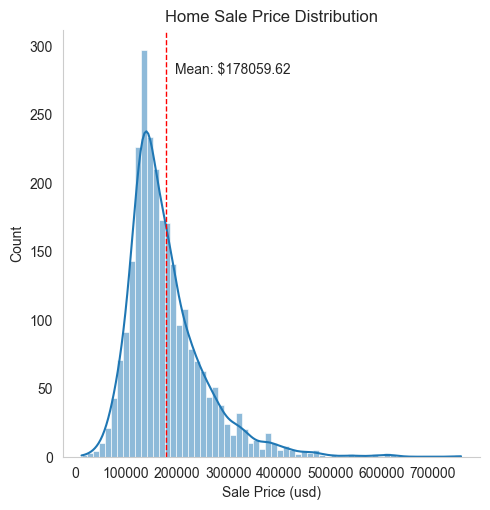

In [4]:
# graph distribution of SalePrice
sns.displot(y, x="SalePrice", kde=True)
plt.title('Home Sale Price Distribution')
plt.xlabel('Sale Price (usd)')
plt.grid(False)

# define mean on graph
mean = y['SalePrice'].mean()
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean*1.1, max_ylim*0.9, 'Mean: ${:.2f}'.format(mean))

## Data type and unique value count 

In [5]:
# count data type and form array
#X_dtypes = X.dtypes.value_counts()
df_dtypes_array = np.array(df.dtypes.value_counts())

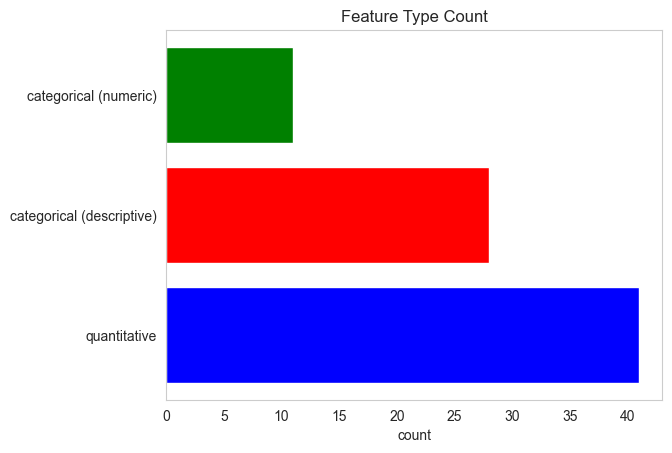

In [6]:
# horizontal barchart datatype counts
labels = ['quantitative', 'categorical (descriptive)', 'categorical (numeric)']
values = df_dtypes_array

# # getting values against each value of y
# x=[5,24,35,67,12]
plt.barh(labels, values, color=['blue', 'red', 'green'])
plt.grid(False)

# setting label of x-axis
plt.xlabel("count")
plt.title("Feature Type Count")
plt.show()

In [7]:
# categorical and numeric feature count and feature list
num_count = df.dtypes.value_counts().iloc[0] + X.dtypes.value_counts().iloc[2].sum() # numeric feature count
num_cols = df.select_dtypes(exclude='object').columns
#num_cols

cat_count = df.dtypes.value_counts().iloc[1] # categorical feature count
cat_cols = df.columns[df.dtypes==object]
#cat_cols

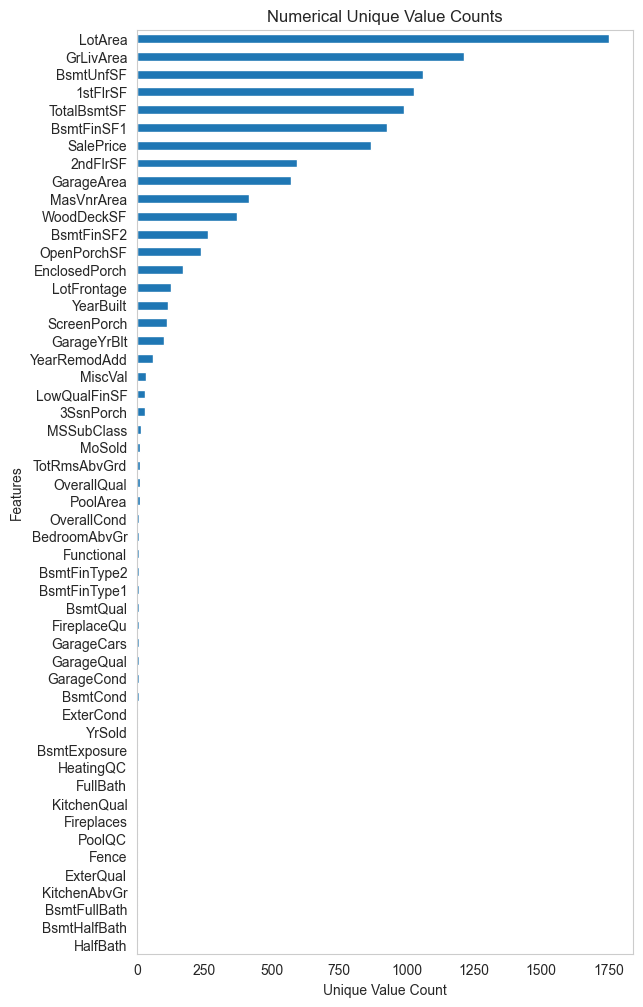

In [8]:
### unique value count ranked for numeric
plt.figure().set_figheight(12)
df[num_cols].nunique().sort_values(ascending=True).plot.barh()
plt.title('Numerical Unique Value Counts')
plt.ylabel('Features')
plt.xlabel('Unique Value Count')
plt.grid(False)

plt.show()

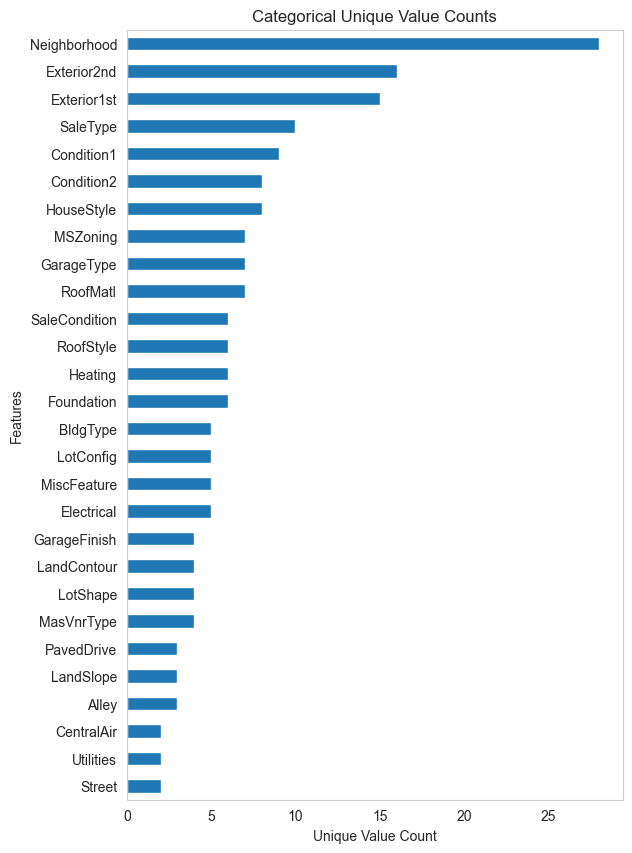

In [9]:
### unique value count ranked for categorical
plt.figure().set_figheight(10)
df[cat_cols].nunique().sort_values(ascending=True).plot.barh()
plt.title('Categorical Unique Value Counts')
plt.ylabel('Features')
plt.xlabel('Unique Value Count')
plt.grid(False)

plt.show()

## Numeric Feature Correlation

<AxesSubplot: >

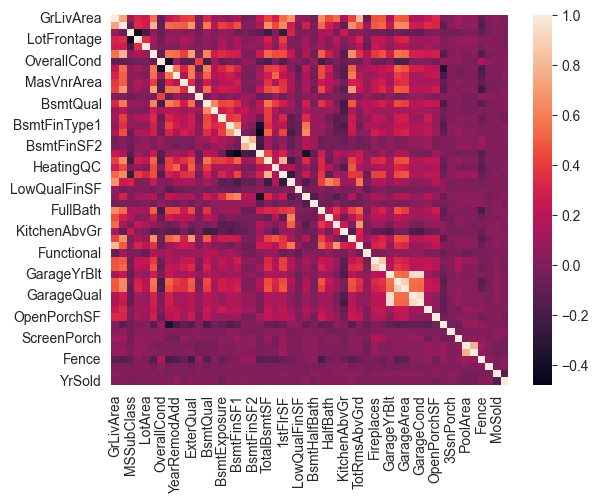

In [10]:
pearson_corr = df[num_cols].corr(method='pearson', numeric_only=True)
sns.heatmap(pearson_corr)

In [11]:
# pearson correlation between numerica features and 'SalePrice'
num_cols_rank = pearson_corr['SalePrice'].sort_values(ascending=True)
#num_cols_rank = num_cols_rank[:-1][num_cols_rank > 0.4]

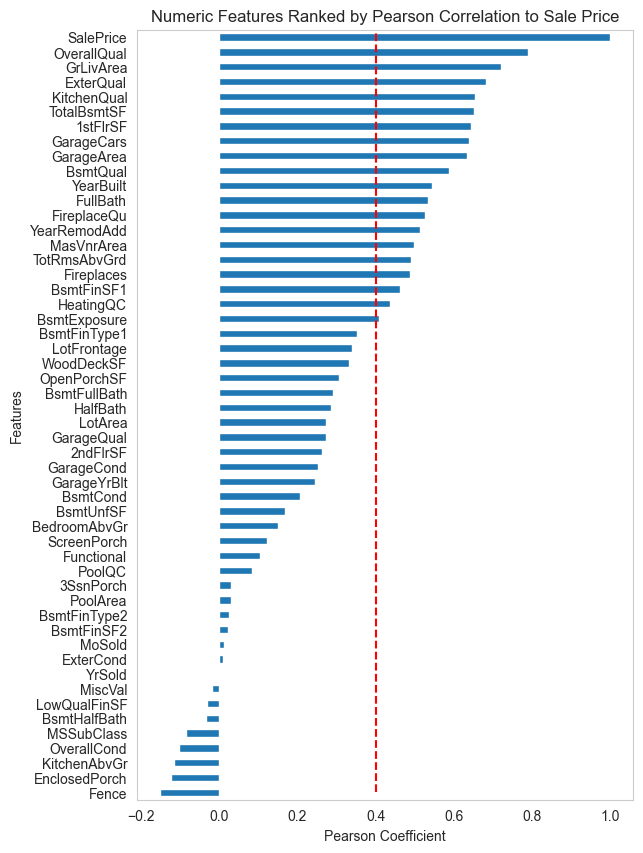

In [12]:
# Numeric features ranked by pearson correlation to Sale Price
plt.figure().set_figheight(10)
num_cols_rank.plot.barh()
plt.title('Numeric Features Ranked by Pearson Correlation to Sale Price')
plt.ylabel('Features')
plt.xlabel('Pearson Coefficient')
plt.vlines(x=0.4, ymin=0, ymax=len(num_cols_rank), colors='red', linestyle='dashed')
plt.grid(False)
plt.show()

## Categorical feature correlation (chi squared)

In [13]:
# create df_cat_cols with only categorical features
df_cat_cols = pd.concat([df[cat_cols], y], axis=1)
df_cat_cols

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Heating,CentralAir,Electrical,GarageType,GarageFinish,PavedDrive,MiscFeature,SaleType,SaleCondition,SalePrice
1,RL,Pave,N_A,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,...,GasA,Y,SBrkr,Detchd,Unf,Y,N_A,WD,Normal,126000
2,RL,Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,GasA,Y,SBrkr,Attchd,Fin,Y,N_A,WD,Normal,139500
3,C (all),Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,GasA,Y,SBrkr,Detchd,Unf,N,N_A,WD,Normal,124900
4,RL,Pave,N_A,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,...,GasA,Y,SBrkr,Detchd,Unf,N,N_A,WD,Normal,114000
5,RL,Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,GasA,Y,SBrkr,Attchd,Fin,Y,N_A,WD,Normal,227000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,RL,Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,...,Grav,N,FuseF,Detchd,Unf,P,N_A,WD,Normal,121000
760,RL,Pave,N_A,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,...,GasA,Y,FuseA,Attchd,Unf,Y,N_A,WD,Normal,139600
761,RH,Pave,N_A,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,...,GasA,N,FuseA,2Types,Unf,Y,N_A,WD,Normal,145000
762,RL,Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,GasA,Y,SBrkr,Attchd,Fin,Y,N_A,WD,Normal,217500


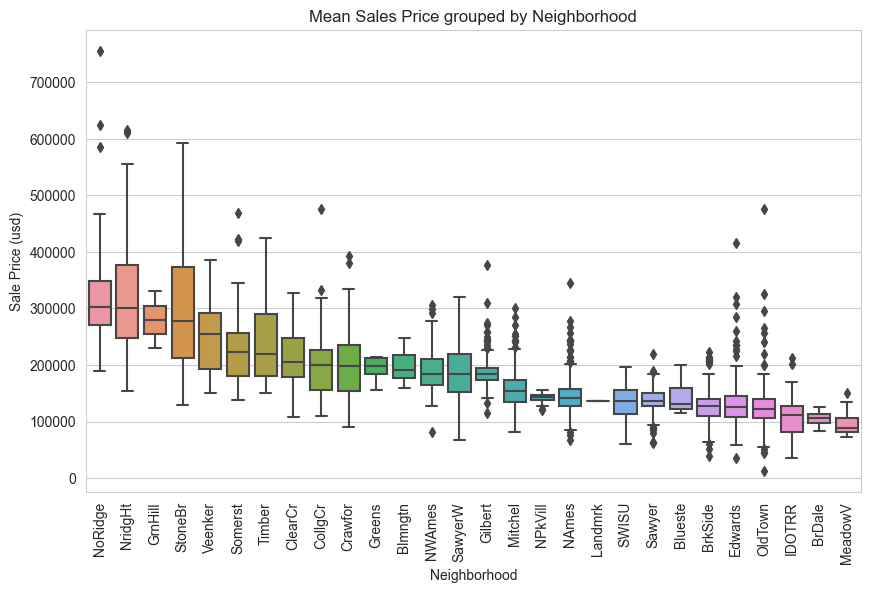

In [14]:
# rank neighborhood' category by mean sale price
ranks = df_cat_cols.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False).index

# plot box plots in order of median neighborhood sale price
plt.figure(figsize=(10,6))
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_cat_cols, order=ranks)
plt.title('Mean Sales Price grouped by Neighborhood')
# plt.xlabel("Neighborhood")
# plt.xticks(rotation=90)
plt.ylabel("Sale Price (usd)")
plt.show()

In [15]:
# label encode df_cat_cols
enc = LabelEncoder()
for col_name in cat_cols:
    df_cat_cols[col_name] = enc.fit_transform(df_cat_cols[col_name])

df_cat_cols

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Heating,CentralAir,Electrical,GarageType,GarageFinish,PavedDrive,MiscFeature,SaleType,SaleCondition,SalePrice
1,5,1,1,3,3,0,0,0,21,2,...,1,1,4,5,3,2,1,9,4,126000
2,5,1,1,3,3,0,4,0,7,2,...,1,1,4,1,0,2,1,9,4,139500
3,1,1,1,3,3,0,4,0,11,2,...,1,1,4,5,3,0,1,9,4,124900
4,5,1,1,3,3,0,0,0,20,2,...,1,1,4,5,3,0,1,9,4,114000
5,5,1,1,3,3,0,4,0,17,2,...,1,1,4,1,0,2,1,9,4,227000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,5,1,1,3,3,0,4,0,3,2,...,3,0,1,5,3,1,1,9,4,121000
760,5,1,1,0,3,0,1,0,7,2,...,1,1,0,1,3,2,1,9,4,139600
761,4,1,1,3,1,0,4,0,6,2,...,1,0,0,0,3,2,1,9,4,145000
762,5,1,1,3,3,0,4,0,5,2,...,1,1,4,1,0,2,1,9,4,217500


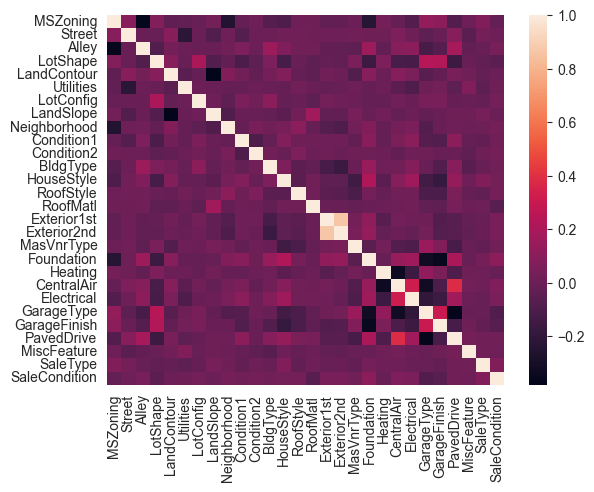

In [16]:
# pearson correlation heat map for categorical features
corr = df_cat_cols.iloc[:, :-1].corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.show()

In [17]:
# chi squared analysis of categorical features to sale price
res = chi2(df_cat_cols, df_cat_cols['SalePrice'])
top_cat_features = pd.DataFrame({
    'features': df_cat_cols.columns,
    'chi2': res[0]
    #'p-value': res[1]
})

In [18]:
top_cat_features = top_cat_features.sort_values('chi2', ascending=False).tail(-1)[:5].sort_values('chi2', ascending=True)#.set_index('features')
top_cat_features

,features,chi2
5,Utilities,1352.500000
22,GarageType,1949.252476
11,BldgType,2443.691128
8,Neighborhood,3440.088052
14,RoofMatl,5198.687929


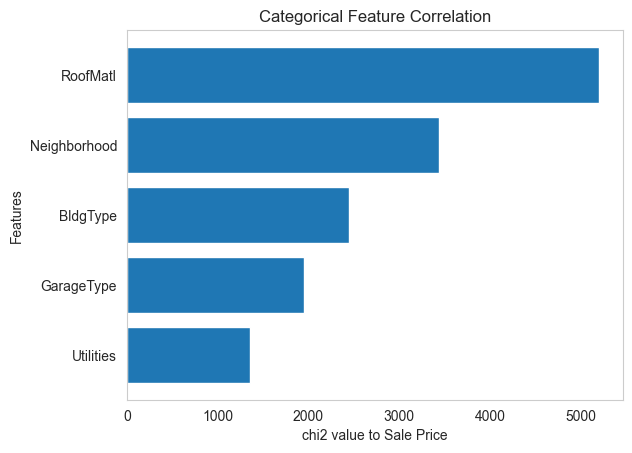

In [19]:
# bar graph of top five chi squared correlated features
y = top_cat_features['features']
x = top_cat_features['chi2']

plt.barh(y, x)
plt.xlabel("chi2 value to Sale Price")
plt.ylabel("Features")
plt.title("Categorical Feature Correlation")
plt.grid(None)
plt.show()